In [188]:
import numpy as np
import matplotlib.pyplot as plt
import math
import latexify

In [189]:
gamma_eg = 200
T2 = 0.4*10**-6
N = 1.32*10**14
g = 0.02*2*np.pi
omega_c = 2*np.pi*3*10**9
Q = 5*10**4
kappa_c = omega_c/Q
q = 16
s_in = 1*10**-12

maser_threshold = gamma_eg*((1+kappa_c/(2*T2*(g**2)*N))/(1-kappa_c/(2*T2*(g**2)*N)))
over_pump_threshold = (((4*(g**2)*N)/kappa_c) - (2/T2))/q

print(maser_threshold)
print(over_pump_threshold)

316.84418612151524
1069800.7675795092


In [190]:
@latexify.with_latex
def amplifying_gain(pump_rate):
    return ((((pump_rate - gamma_eg)/(pump_rate + gamma_eg))*N + (((q*pump_rate + gamma_eg + 2/T2)*kappa_c)/(4*g**2)))**2)/((((pump_rate - gamma_eg)/(pump_rate + gamma_eg))*N - (((q*pump_rate + gamma_eg + 2/T2)*kappa_c)/(4*g**2)))**2)

print(amplifying_gain)

\mathrm{amplifying_gain}(pump_rate)\triangleq \frac{(\frac{pump_rate - gamma_eg}{pump_rate + gamma_eg}N + \frac{(qpump_rate + gamma_eg + \frac{2}{T2})kappa_c}{4g^{2}})^{2}}{(\frac{pump_rate - gamma_eg}{pump_rate + gamma_eg}N - \frac{(qpump_rate + gamma_eg + \frac{2}{T2})kappa_c}{4g^{2}})^{2}}


In [239]:
@latexify.with_latex
def masing_gain(pump_rate):
    return (np.sqrt(((pump_rate + gamma_eg)/(2*np.absolute(s_in)**2))*(((pump_rate - gamma_eg)/(pump_rate + gamma_eg))*N - (((q*pump_rate + gamma_eg + 2/T2)*kappa_c)/(4*g**2))))-1)**2

print(masing_gain)

\mathrm{masing_gain}(pump_rate)\triangleq (\mathrm{np.sqrt}\left(\frac{pump_rate + gamma_eg}{2\mathrm{np.absolute}\left(s_in\right)^{2}}(\frac{pump_rate - gamma_eg}{pump_rate + gamma_eg}N - \frac{(qpump_rate + gamma_eg + \frac{2}{T2})kappa_c}{4g^{2}})\right) - 1)^{2}


In [265]:
pump_rate1 = np.arange(200, 316, 0.1)

In [266]:
pump_rate2 = np.arange(318, 1069200, 1)

In [267]:
pump_rate3 = np.arange(1069800, 10698000, 10)

In [243]:
gain1 = amplifying_gain(pump_rate1)

In [244]:
gain2 = masing_gain(pump_rate2)

In [245]:
gain3 = amplifying_gain(pump_rate3)

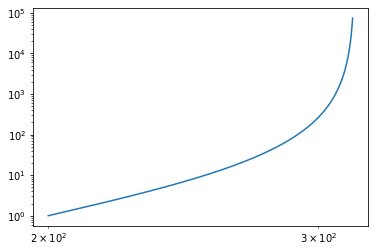

In [246]:
plt.plot(pump_rate1, gain1)
plt.xscale('log')
plt.yscale('log')

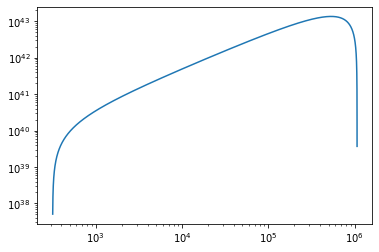

In [247]:
plt.plot(pump_rate2, gain2)
plt.xscale('log')
plt.yscale('log')

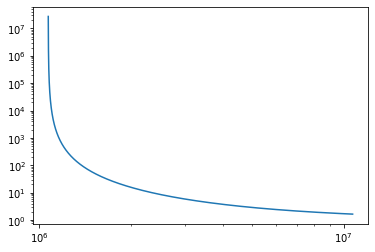

In [248]:
plt.plot(pump_rate3, gain3)
plt.xscale('log')
plt.yscale('log')

In [249]:
gain = np.append(gain1,gain2)
pump_rates = np.append(pump_rate1, pump_rate2)

gain = gain = np.append(gain,gain3)
pump_rates = np.append(pump_rates, pump_rate3)

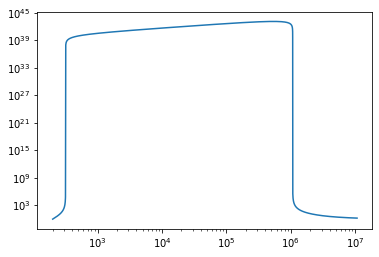

In [250]:
plt.plot(pump_rates, gain)
plt.xscale('log')
plt.yscale('log')